# Loading data and visualizing the corpus

## Load the data

First, we need to load the data into the Notebook. We do this by using [pandas](https://pandas.pydata.org/), which is a powerfool and widely used tool for data analysis in Python.

### Import pandas into the notebook

In [1]:
import pandas as pd

### Store corpus in a pandas DataFrame

In [2]:
vaderland = pd.read_csv("data/HetVaderland_1873.csv", index_col = 0)

In [3]:
standaard = pd.read_csv("data/DeStandaard_1873.csv", index_col = 0)

In [4]:
tijd = pd.read_csv("data/DeTijd_1873.csv", index_col = 0)

In [5]:
vaderland.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied
0,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,Ontwerp van wet tot wijziging der wetten betre...,1873/04/25 00:00:00,"’s Graven hage, 24 April.! m- Om de re^e&eu, i...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk
1,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,De strijd tegen den Nederlandschen Sigarenmake...,1873/04/25 00:00:00,11. De positie der sigarenmakers in Nederland ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk


In [6]:
standaard.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied
0,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065451:mpeg21,artikel,Algemeen Overzicht.,1873/01/02 00:00:00,Hot gunstig oordeel dat do meeste buitenlandsc...,De standaard,Landelijk
1,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065451:mpeg21,artikel,FEUILLETON. „Vassar College.”,1873/01/02 00:00:00,Wie gaarno de hand in brandnetels of wespennes...,De standaard,Landelijk


In [7]:
tijd.head(2)
tijd.value_counts('krantnaam')

krantnaam
De Tĳd : godsdienstig-staatkundig dagblad     16069
De TÄ³d : godsdienstig-staatkundig dagblad       60
Name: count, dtype: int64

### Combine the datasets into one big DataFrame

In [8]:
data = pd.concat([vaderland, standaard, tijd])

### Add month and day to dataset

In [9]:
data["date"] = pd.to_datetime(data["date"])

In [10]:
data['month'] = data['date'].dt.strftime("%B")
data['day'] = data['date'].dt.strftime("%A")

In [11]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
0,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,Ontwerp van wet tot wijziging der wetten betre...,1873-04-25,"’s Graven hage, 24 April.! m- Om de re^e&eu, i...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday
1,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,De strijd tegen den Nederlandschen Sigarenmake...,1873-04-25,11. De positie der sigarenmakers in Nederland ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday
2,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,BUITENLAND.,1873-04-25,"'*» Gravenhage, 04 April.. De openbare vergade...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday
3,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,Spaansche zaken.,1873-04-25,De vorige week Donderdag ts volgens den corres...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday
4,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,VERSPREIDE BERIHTEN.,1873-04-25,Gemengd nieuws. Een vrouw te Londen heeft Zate...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday


We have now added the month and day on which an article was published in separate columns. For future purposes, it is convenient to sort the DataFrame by date.

In [12]:
data = data.sort_values(by='date')
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
13792,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,RIVIKR-VA.A.B-',1873-01-01,"&M.STERDAM 31 December, ü ding n_ar: Tot Mannh...",De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
13747,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,?sfde van den feestdag:,1873-01-01,?sfde van den feestdag: 'ESIIIJI.EIIIS O. 11.»...,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
13748,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,"'^ERDAIVI, 31 December.",1873-01-01,NaN,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
6969,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,WATERHOOGTE.,1873-01-01,"M<i.bh'i;n,27l>cc. 10 »:. 0 dm. Gtv. 4 dm. CoU...",De standaard,Landelijk,January,Wednesday
6968,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,KOERS VAN ANTWERPEN 30 Dec. 1872.,1873-01-01,Amiterdam ztgt £r. 210.05 Geld. fr. 210 30 pap...,De standaard,Landelijk,January,Wednesday


As you can see, the first rows of the DataFrame now contain the articles from January 1st. 

## Visualise the data

### Unique number of newspapers

In [13]:
unique_newspapers = data.groupby('krantnaam')['oaiIdentifier'].nunique()
df_unique_newspapers = unique_newspapers.to_frame(name='unique_value')
df_unique_newspapers

,unique_value
krantnaam,
De TÄ³d : godsdienstig-staatkundig dagblad,1
De Tĳd : godsdienstig-staatkundig dagblad,301
De standaard,307
Het vaderland : staat- en letterkundig nieuwsblad,309


We notice that there is 1 article with the assigned newspaper title 'De TÄ³d : godsdienstig-staatkundig dagblad'. This is a typo, and we want to add this instance to the list of articles from De Tijd/	

In [18]:
data.loc[data['krantnaam'] == 'De TÄ³d : godsdienstig-staatkundig dagblad', 'krantnaam'] = 'De Tĳd : godsdienstig-staatkundig dagblad'

unique_newspapers = data.groupby('krantnaam')['oaiIdentifier'].nunique()
df_unique_newspapers = unique_newspapers.to_frame(name='unique_value')
df_unique_newspapers

,unique_value
krantnaam,
De Tĳd : godsdienstig-staatkundig dagblad,302
De standaard,307
Het vaderland : staat- en letterkundig nieuwsblad,309


Next, let's visualize the distribution of newspapers in the corpus.

<Axes: title={'center': 'Unique number of newspaper issues in 1873 (in Delpher)'}, ylabel='krantnaam'>

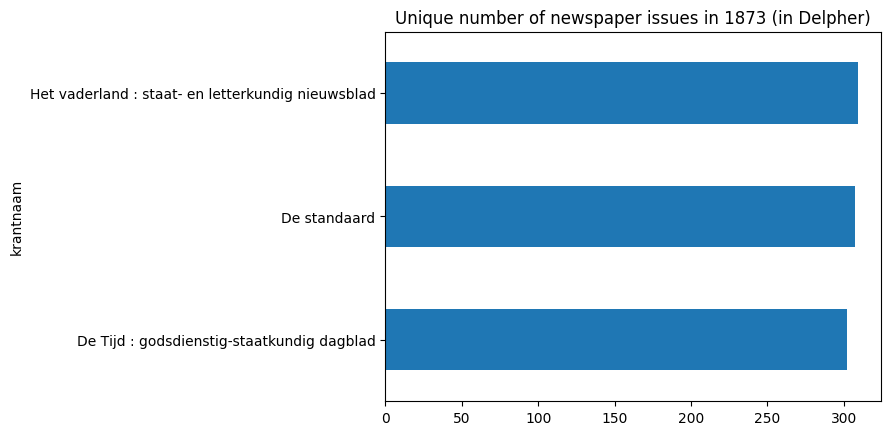

In [19]:
unique_newspapers.plot(kind = 'barh', title = "Unique number of newspaper issues in 1873 (in Delpher)")

In [20]:
import plotly.express as px

In [21]:
fig = px.bar(unique_newspapers,
             orientation='h',
             title='Unique number of newspaper issues in 1873 (in Delpher)')
fig.show()

We now have a pretty good visualization of the distribution of newspapers in the corpus. Of course, there are more possibilities when it comes to visualizing the basic information of a corpus. Let's see how we can use Plotly to create a pie chart. 

In [22]:
fig = px.pie(df_unique_newspapers,
             values='unique_value',
             names=['De Tijd', 'De Standaard', 'Het Vaderland'],
             title='Distribution of newspapers in corpus')

fig.show()

### Number of articles per newspaper

Next, let's look at the distribution of articles per newspaper. With a simple bar plot, we can visualize the total number of articles for each newspaper. 

In [23]:
unique_articles = data.groupby('krantnaam')['identifier'].nunique()

plt = px.bar(unique_articles,
             orientation='h',
             title='Number of unique articles')

plt.show()

We see that, in terms of the number of articles, our dataset is imbalanced. While the number of newspaper issues is evenly distibuted accross the different newspapers, there are significantly more articles from De Tijd. One explanation could be that De Tijd contains more shorter articles than the other newspapers.  

### Numbers of unique newspapers per month

What about the distribution of newspapers over the different months? This information can help identify gaps in your dataset. 

In [25]:
month_values = data.groupby(['month'])['oaiIdentifier'].nunique()

fig = px.bar(data,
    x=data['month'].unique(),
    y=month_values,
    labels={'x': 'Month', 'y': 'Total number of newspapers'},
    title='Total number of newspaper issues per month'
)

fig.show()


The plot tells us that there is no significant variation in the amound of newspaper issues per month. This is good news, as it means that there are no large gaps in our dataset. 

TODO (?): create grouped bar plot with number of newspapers per newspaper title per month

### Days on which the newspaper were published

Now let's take a look at the days on which the newspapers in the corpus were published. Does one day stand out, either because the bars peak or drop on that day?

In [26]:
weekday_values = data.groupby(['day'])['oaiIdentifier'].nunique()

fig = px.bar(data,
    x=data['day'].unique(),
    y=weekday_values,
    labels={'x': 'Day', 'y': 'Total number of newspapers'},
    title='Total number of newspaper issues per day of the week'
)

fig.update_xaxes(
    categoryorder='array',
    categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

fig.show()

We can see that the newspaper issues are evenly distributed over the days of the week. This generally is good news!

### Average OCR quality??

(Misschien kunnen we van tevoren een basisc woordenboek lookup doen en dat hier plotten??).
In het kader van bronnenkritiek en omdat het oude kranten zijn.

En dan misschien ook iets visualiseren van als je alleen artikelen met een kwaliteit van 80% of hoger hebt hoeveel van je corpus je dan overhoudt?